<a href="https://colab.research.google.com/github/GhaziBenHenia/Predictive_Modeling_and_Interpretability_Techniques_for_SoC_Performance_with_Machine_Learning/blob/main/Predictive_Modeling_and_Interpretability_Techniques_for_SoC_Performance_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/PROJET LIRMM

/content/drive/MyDrive/PROJET LIRMM


In [ ]:
import os
import numpy as np
from numpy.random import seed
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, Reshape, Flatten
from tensorflow.keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import clone_model
from tensorflow.keras.optimizers import Adam,RMSprop

In [ ]:
#Loading Data
dataset = pd.read_csv('/content/drive/MyDrive/PROJET LIRMM/dataset.csv')
target = dataset['Base_Result']
dataset = dataset.drop('Base_Result', axis=1)

In [ ]:
dataset

,Benchmark,Hardware_Vendor,Energy_Peak_Result,#_Cores,#_Chips,#_Enabled_Threads_Per_Core,Processor,Processor_MHz,Base_Pointer_Size,Peak_Pointer_Size,...,Memory,Storage,Operating_System,File_System,Compiler,HW_Avail,SW_Avail,Test_Date,Published,Updated
0,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0.0,2,1,1,2,1,0,1,...,1,1,2,1,1,2,0,2,0,0
3,0,0,0.0,3,1,1,3,1,0,1,...,1,1,1,1,2,1,2,3,2,1
4,0,0,0.0,4,1,1,4,2,0,1,...,1,1,2,1,3,2,3,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26978,3,33,0.0,9,1,0,29,7,0,1,...,6,74,9,1,3,43,9,30,28,28
26979,3,33,0.0,6,1,0,33,9,0,1,...,6,74,9,1,3,43,9,30,28,28
26980,3,33,0.0,17,1,0,123,4,0,2,...,0,4,144,1,5,21,9,25,23,23
26981,3,33,0.0,17,2,0,24,6,0,2,...,1,22,9,1,3,32,3,36,28,28


In [ ]:
# Standardize the features on the entire dataset
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

# Create a DataFrame with the scaled features and the same feature names
dataset_scaled_df = pd.DataFrame(dataset_scaled, columns=dataset.columns)

# Save the scaled dataset to a CSV file
dataset_scaled_df.to_csv('/content/drive/MyDrive/PROJET LIRMM/dataset_scaled.csv', index=False)

seed(0)

# Split the scaled dataset into training (80%) and temporary set (20%)
X_train_scaled, X_temp, y_train, y_temp = train_test_split(dataset, target, test_size=0.2) #Change "dataset" to "dataset_scaled_df" to use the scaled dataset

# Further split the temporary set into testing (50%) and validation (50%)
X_test_scaled, X_val_scaled, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

Scaling the data improves the performance of the prediction model but not that of the autoencoder.

In [ ]:
X_train_scaled

,Benchmark,Hardware_Vendor,Energy_Peak_Result,#_Cores,#_Chips,#_Enabled_Threads_Per_Core,Processor,Processor_MHz,Base_Pointer_Size,Peak_Pointer_Size,...,Memory,Storage,Operating_System,File_System,Compiler,HW_Avail,SW_Avail,Test_Date,Published,Updated
8130,1,6,0.0,12,1,0,174,15,0,2,...,6,10,99,1,30,1,19,3,2,8
16252,2,8,0.0,6,1,0,7,2,0,0,...,7,39,135,2,2,1,36,13,10,7
9196,1,8,0.0,15,1,1,154,3,0,1,...,6,25,134,1,11,37,14,41,35,27
22765,3,6,0.0,7,0,0,118,3,0,1,...,5,10,94,1,5,22,9,26,22,24
21930,3,4,0.0,7,2,0,38,14,0,2,...,9,6,87,1,15,1,19,4,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2,2,0.0,9,1,0,216,3,0,0,...,6,0,246,0,1,1,7,17,20,20
19648,3,0,0.0,7,0,0,96,0,0,1,...,0,2,7,1,6,13,8,24,22,24
9845,1,10,0.0,5,1,1,195,21,0,1,...,7,13,153,2,7,35,10,46,42,27
10799,1,10,0.0,9,2,1,261,1,0,1,...,9,13,145,1,7,19,10,29,47,27


#Using Autoencoder

In [ ]:
# Input layer
input_dim = Input(shape=(24,))
# Output layer
encoding_dim = 10 #Specifies the dimention of the Latent Space

In [ ]:
#Prediction model
encoded = Dense(24, activation='linear')(input_dim)
encoded = Dense(512, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded) #Later this layer will be the Bottleneck layer for the autoencoder
pred = Dense(1, activation='linear',kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(encoded)

pred_model = Model(input_dim, pred)
pred_model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
pred_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 512)               12800     
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 dense_6 (Dense)             (None, 1)                 11    

In [ ]:
history = pred_model.fit(X_train_scaled, y_train, epochs=250, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/250
2159/2159 [==============================] - 10s 4ms/step - loss: 97.5114 - val_loss: 82.3478
Epoch 2/250
2159/2159 [==============================] - 7s 3ms/step - loss: 69.1587 - val_loss: 62.4430
Epoch 3/250
2159/2159 [==============================] - 9s 4ms/step - loss: 60.4926 - val_loss: 61.1761
Epoch 4/250
2159/2159 [==============================] - 7s 3ms/step - loss: 55.6428 - val_loss: 57.2081
Epoch 5/250
2159/2159 [==============================] - 9s 4ms/step - loss: 52.2505 - val_loss: 64.9721
Epoch 6/250
2159/2159 [==============================] - 7s 3ms/step - loss: 49.9262 - val_loss: 50.4229
Epoch 7/250
2159/2159 [==============================] - 8s 4ms/step - loss: 47.8312 - val_loss: 48.8148
Epoch 8/250
2159/2159 [==============================] - 9s 4ms/step - loss: 44.3448 - val_loss: 44.3854
Epoch 9/250
2159/2159 [==============================] - 7s 3ms/step - loss: 40.9367 - val_loss: 43.4925
Epoch 10/250
2159/2159 [==============================

In [ ]:
predicted_data = pred_model.predict(X_test_scaled)
predicted_val_data = pred_model.predict(X_val_scaled)
# MAE
mae = (mean_absolute_error(y_test, predicted_data))
mae_val = (mean_absolute_error(y_val, predicted_val_data))
print("Mean Absolute Error (MAE):", mae)
print("Validation Mean Absolute Error (MAE):", mae_val)

85/85 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 7.352075812669928
Validation Mean Absolute Error (MAE): 9.260966731880982


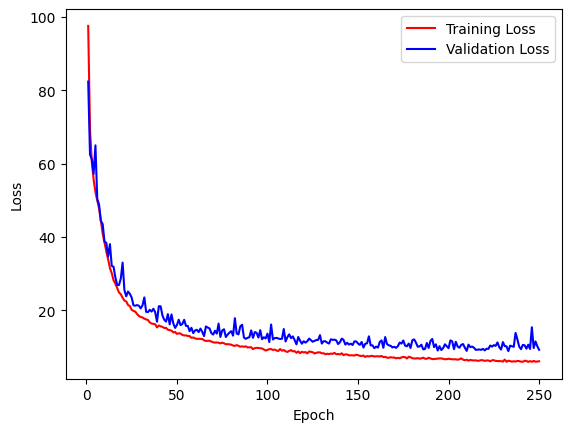

In [ ]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = history.history['loss']
Validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, Validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
# MAE
mae = mean_absolute_error(y_test, predicted_data)
mae_val = mean_absolute_error(y_val, predicted_val_data)
print("Mean Absolute Error (MAE):", mae)
print("Validation Mean Absolute Error (MAE):", mae_val)

# R-squared
r2 = r2_score(y_test, predicted_data)
r2_val = r2_score(y_val, predicted_val_data)
print("R-squared:", r2)
print("Validation R-squared:", r2_val)

# MSE
mse = mean_squared_error(y_test, predicted_data)
mse_val = mean_squared_error(y_val, predicted_val_data)
print("Mean Squared Error (MSE):", mse)
print("Validation Mean Squared Error (MSE):", mse_val)

Mean Absolute Error (MAE): 7.352075812669928
Validation Mean Absolute Error (MAE): 9.260966731880982
R-squared: 0.991075430896118
Validation R-squared: 0.960765888937039
Mean Squared Error (MSE): 265.9672345024205
Validation Mean Squared Error (MSE): 1499.4191859399912


In [ ]:
encoder_model= Model(input_dim, encoded)# the encoder has the same layers of the prediction model

In [ ]:
# Set all layers in encoder_model as not trainable to save the weights of the pretrained model
for layer in encoder_model.layers:
    layer.trainable = False

In [ ]:
# Decoder layers
encoded_ = encoder_model(input_dim) #This returns the output of the encoder (or the Bottleneck)
decoded = Dense(64, activation='relu')(encoded_)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(24, activation='linear')(decoded)

In [ ]:
autoencoder = Model(input_dim, decoded)
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 model_4 (Functional)        (None, 10)                87970     
                                                                 
 dense_16 (Dense)            (None, 64)                704       
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 dense_18 (Dense)            (None, 512)               66048     
                                                                 
 dense_19 (Dense)            (None, 24)                12312     
                                                                 
Total params: 175354 (684.98 KB)
Trainable params: 87384 (3

In [ ]:
# Split the scaled dataset into training (80%) and temporary set (20%)
X_train_scaled, X_temp, y_train, y_temp = train_test_split(dataset, target, test_size=0.2)

# Further split the temporary set into testing (50%) and validation (50%)
X_test_scaled, X_val_scaled, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

In [ ]:
X_train_scaled

,Benchmark,Hardware_Vendor,Energy_Peak_Result,#_Cores,#_Chips,#_Enabled_Threads_Per_Core,Processor,Processor_MHz,Base_Pointer_Size,Peak_Pointer_Size,...,Memory,Storage,Operating_System,File_System,Compiler,HW_Avail,SW_Avail,Test_Date,Published,Updated
25505,3,10,0.0,17,2,0,158,5,0,1,...,9,13,147,1,7,20,27,38,36,27
5025,0,10,0.0,15,1,1,261,1,0,0,...,6,13,145,2,7,20,10,43,47,27
6874,1,2,0.0,6,1,1,112,2,0,1,...,0,16,40,3,5,21,9,25,21,21
6791,1,2,0.0,4,1,1,151,21,0,1,...,11,16,40,3,5,1,9,37,26,26
7850,1,4,0.0,13,0,1,230,14,0,2,...,2,2,88,1,15,29,31,47,39,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25489,3,10,0.0,0,2,0,13,3,0,2,...,9,13,136,2,40,1,1,16,20,20
20930,3,2,0.0,1,0,1,62,15,0,1,...,2,4,2,1,1,3,0,16,15,12
23626,3,8,0.0,7,1,0,178,0,0,1,...,6,9,16,1,7,14,10,43,27,27
17922,2,10,0.0,2,1,0,208,2,0,2,...,1,4,105,1,86,7,31,19,16,14


In [ ]:
hist = autoencoder.fit(X_train_scaled, X_train_scaled, validation_data=(X_val_scaled, X_val_scaled), epochs=50, batch_size=10)

Epoch 1/50
2159/2159 [==============================] - 8s 3ms/step - loss: 10.5241 - val_loss: 9.3168
Epoch 2/50
2159/2159 [==============================] - 10s 5ms/step - loss: 9.1570 - val_loss: 8.8592
Epoch 3/50
2159/2159 [==============================] - 8s 4ms/step - loss: 8.6188 - val_loss: 8.4176
Epoch 4/50
2159/2159 [==============================] - 7s 3ms/step - loss: 8.2991 - val_loss: 8.1911
Epoch 5/50
2159/2159 [==============================] - 8s 4ms/step - loss: 7.9784 - val_loss: 7.7508
Epoch 6/50
2159/2159 [==============================] - 7s 3ms/step - loss: 7.7788 - val_loss: 7.7923
Epoch 7/50
2159/2159 [==============================] - 8s 4ms/step - loss: 7.6266 - val_loss: 7.5334
Epoch 8/50
2159/2159 [==============================] - 7s 3ms/step - loss: 7.4726 - val_loss: 7.3756
Epoch 9/50
2159/2159 [==============================] - 8s 4ms/step - loss: 7.3910 - val_loss: 7.3322
Epoch 10/50
2159/2159 [==============================] - 7s 3ms/step - loss: 7.2

Analyzing the MAE of the reconstructed features

In [ ]:
# Pass the entire dataset to the model
predict_results = autoencoder.predict(dataset)

# Convert the dataset and predictions to numpy arrays
X_array = dataset.to_numpy()
predict_results_array = np.array(predict_results)

# Calculate absolute differences
A_D = np.abs(predict_results_array - X_array)

# Calculate mean MAE for each element
m_mae = np.mean(A_D, axis=0)

# Print or use 'mean_mae' as needed
print("Mean MAE for each element:")
print(len(m_mae),m_mae)

844/844 [==============================] - 2s 2ms/step
Mean MAE for each element:
24 [ 0.37731488  3.85380119  1.00764752  2.57501517  0.29207941  0.29508384
 26.47027051  3.55845362  0.09025703  0.5884747   0.18243773  0.34357807
  2.47111101  0.10405079  2.17205173  6.91880444 49.59232447  0.62242796
  8.76714633  9.3529946   8.21064648  9.03397309  8.73956338  6.97323669]


In [ ]:
# Get feature names
feature_names = X_test_scaled.columns

# Combine feature names with corresponding MAE
features_with_mae = list(zip(feature_names, m_mae))

# Sort based on MAE
sorted_features = sorted(features_with_mae, key=lambda x: x[1])

# Get the top 10 features with smallest MAE
top_10_features = sorted_features[:10]

# Print or use 'top_10_features' as needed
print("Top 10 features with smallest MAE:")
for feature, mae in top_10_features:
    print(f"{feature}: {mae}")

Top 10 features with smallest MAE:
Other_Cache: 0.061451539304290356
Base_Pointer_Size: 0.06206815247580991
1st_Level_Cache: 0.16185921904430012
Energy_Peak_Result: 0.21002732650838757
#_Enabled_Threads_Per_Core: 0.2621852165630015
#_Chips: 0.32565079386710627
2nd_Level_Cache: 0.3554019277668713
Benchmark: 0.41252328846380665
File_System: 0.5338445597960598
Peak_Pointer_Size: 0.6338740693474922


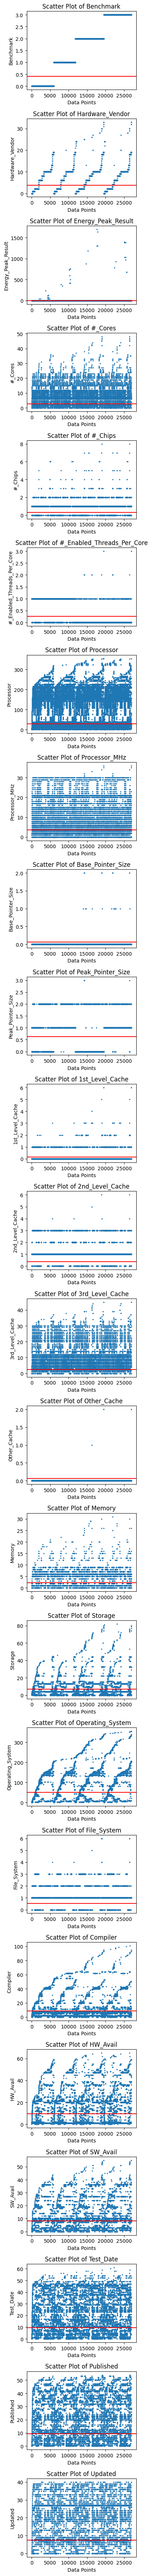

In [ ]:
import matplotlib.pyplot as plt
# Creating subplots
fig, axes = plt.subplots(nrows=len(dataset.columns), ncols=1, figsize=(4, 3 * len(dataset.columns)))

# Iterate through each feature and create scatter plots

for i, column in enumerate(dataset.columns):
    axes[i].scatter(range(len(dataset)), dataset[column], s=2)  # s is the marker size
    axes[i].set_title(f"Scatter Plot of {column}")
    axes[i].set_xlabel("Data Points")
    axes[i].set_ylabel(column)
    axes[i].axhline(y=m_mae[i], color='red', linestyle='-')

# For adjusting layout
plt.tight_layout()

plt.show()


Analyzing the correlation of the reconstructed features

In [ ]:
# Convert the original dataset and predictions to Pandas DataFrames
or_df = pd.DataFrame(dataset.to_numpy(), columns=dataset.columns)
reconst_df = pd.DataFrame(predict_results, columns=dataset.columns)

# Calculate the correlation matrix
corr_matrix = or_df.corrwith(reconst_df)

# Print or use the correlation matrix as needed
print("Correlation between input features and reconstructed features:")
print(corr_matrix)


Correlation between input features and reconstructed features:
Benchmark                     0.860976
Hardware_Vendor               0.267571
Energy_Peak_Result            0.994182
#_Cores                       0.720616
#_Chips                       0.646217
#_Enabled_Threads_Per_Core    0.603663
Processor                     0.793397
Processor_MHz                 0.679291
Base_Pointer_Size             0.056651
Peak_Pointer_Size             0.289656
1st_Level_Cache               0.696480
2nd_Level_Cache               0.655314
3rd_Level_Cache               0.834070
Other_Cache                   0.093997
Memory                        0.318763
Storage                       0.238902
Operating_System              0.366657
File_System                   0.170535
Compiler                      0.393120
HW_Avail                      0.366402
SW_Avail                      0.262267
Test_Date                     0.569747
Published                     0.566291
Updated                       0.406293
d

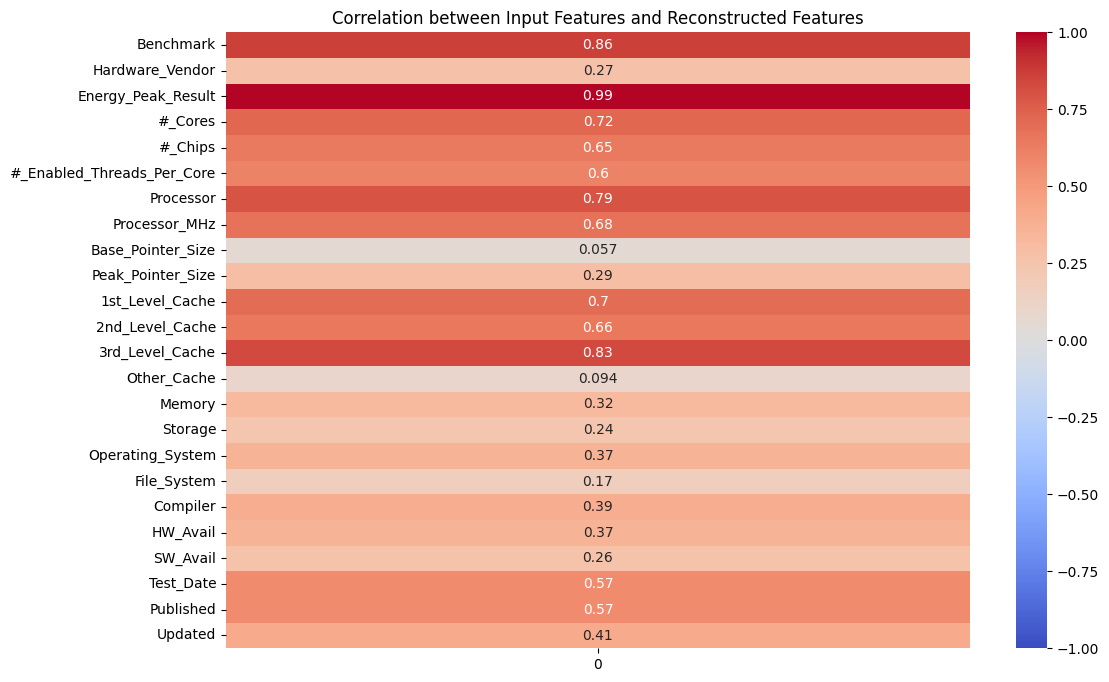

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Input Features and Reconstructed Features")
plt.show()


In [ ]:
import pandas as pd

# Assuming `or_df` and `reconst_df` are already defined as per your code

# Calculate the correlation matrix
corr_matrix = or_df.corrwith(reconst_df)

# Order the correlation matrix based on absolute correlation values
sorted_corr_matrix = corr_matrix.sort_values(ascending=False)

# Print or use the sorted correlation matrix as needed
print("Sorted correlation between input features and reconstructed features:")
print(sorted_corr_matrix)


Sorted correlation between input features and reconstructed features:
Energy_Peak_Result            0.994182
Benchmark                     0.860976
3rd_Level_Cache               0.834070
Processor                     0.793397
#_Cores                       0.720616
1st_Level_Cache               0.696480
Processor_MHz                 0.679291
2nd_Level_Cache               0.655314
#_Chips                       0.646217
#_Enabled_Threads_Per_Core    0.603663
Test_Date                     0.569747
Published                     0.566291
Updated                       0.406293
Compiler                      0.393120
Operating_System              0.366657
HW_Avail                      0.366402
Memory                        0.318763
Peak_Pointer_Size             0.289656
Hardware_Vendor               0.267571
SW_Avail                      0.262267
Storage                       0.238902
File_System                   0.170535
Other_Cache                   0.093997
Base_Pointer_Size             0.0

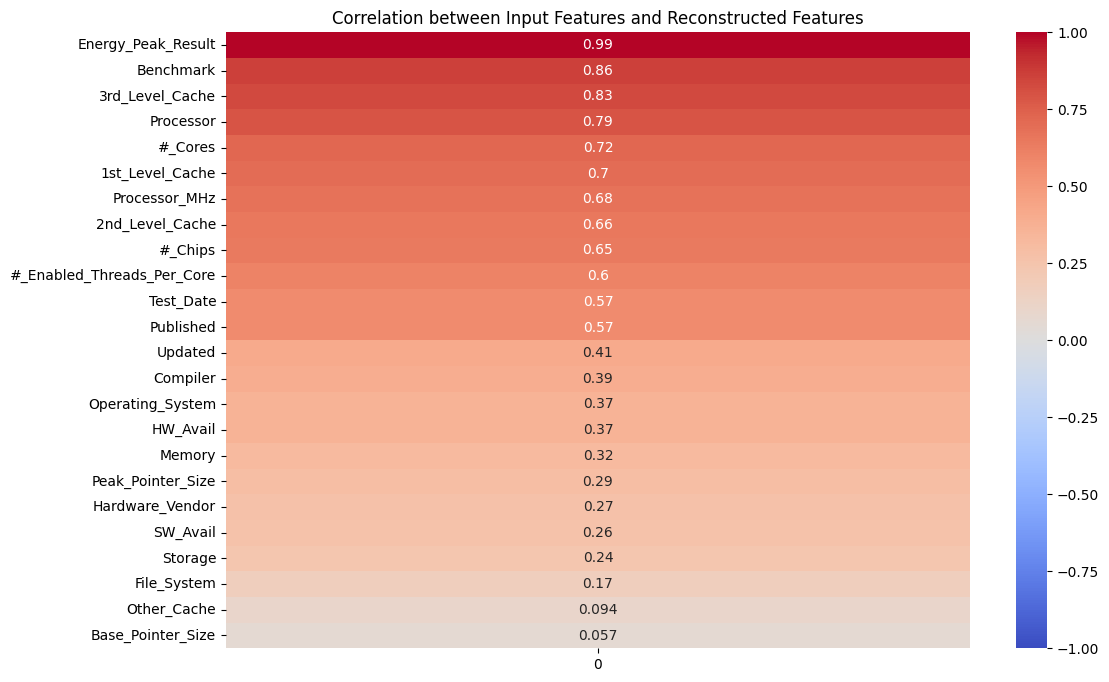

In [ ]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sorted_corr_matrix.to_frame(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Input Features and Reconstructed Features")
plt.show()


In [ ]:
top_10_features = sorted_corr_matrix.head(10)
print("Top 10 features with highest correlation:")
print(top_10_features)

Top 10 features with highest correlation:
Energy_Peak_Result            0.994182
Benchmark                     0.860976
3rd_Level_Cache               0.834070
Processor                     0.793397
#_Cores                       0.720616
1st_Level_Cache               0.696480
Processor_MHz                 0.679291
2nd_Level_Cache               0.655314
#_Chips                       0.646217
#_Enabled_Threads_Per_Core    0.603663
dtype: float64


Using Kindall's rank correlation

In [ ]:
import pandas as pd
from scipy.stats import kendalltau

# Convert the original dataset and predictions to Pandas DataFrames
or_df = pd.DataFrame(dataset.to_numpy(), columns=dataset.columns)
reconst_df = pd.DataFrame(predict_results, columns=dataset.columns)

# Calculate the correlation matrix
corr_matrix, _ = kendalltau(or_df, reconst_df)

# Print or use the correlation matrix as needed
print("Kendall's rank correlation between input features and reconstructed features:")
print(corr_matrix)


Kendall's rank correlation between input features and reconstructed features:
0.7440440787417337


In [ ]:
import pandas as pd
from scipy.stats import kendalltau

# Convert the original dataset and predictions to Pandas DataFrames
or_df = pd.DataFrame(dataset.to_numpy(), columns=dataset.columns)
reconst_df = pd.DataFrame(predict_results, columns=dataset.columns)

# Iterate over each feature
for column in or_df.columns:
    # Calculate Kendall's rank correlation coefficient between original and reconstructed feature
    corr_coef, _ = kendalltau(or_df[column], reconst_df[column])

    # Print the correlation coefficient
    print(f"Correlation between '{column}' and its reconstruction: {corr_coef}")


Correlation between 'Benchmark' and its reconstruction: 0.7063381542120292
Correlation between 'Hardware_Vendor' and its reconstruction: 0.17538032770985046
Correlation between 'Energy_Peak_Result' and its reconstruction: -0.00837549638535926
Correlation between '#_Cores' and its reconstruction: 0.6203617079233906
Correlation between '#_Chips' and its reconstruction: 0.5037313167515234
Correlation between '#_Enabled_Threads_Per_Core' and its reconstruction: 0.5080653171054474
Correlation between 'Processor' and its reconstruction: 0.6593456618724903
Correlation between 'Processor_MHz' and its reconstruction: 0.4839415104228438
Correlation between 'Base_Pointer_Size' and its reconstruction: 0.00917800904639221
Correlation between 'Peak_Pointer_Size' and its reconstruction: 0.31225479840751613
Correlation between '1st_Level_Cache' and its reconstruction: 0.43246105360692694
Correlation between '2nd_Level_Cache' and its reconstruction: 0.46021667911519104
Correlation between '3rd_Level_Ca

In [ ]:
import pandas as pd
from scipy.stats import kendalltau

# Convert the original dataset and predictions to Pandas DataFrames
or_df = pd.DataFrame(dataset.to_numpy(), columns=dataset.columns)
reconst_df = pd.DataFrame(predict_results, columns=dataset.columns)

# Initialize a list to store correlation coefficients and feature names
correlation_scores = []

# Iterate over each feature
for column in or_df.columns:
    # Calculate Kendall's rank correlation coefficient between original and reconstructed feature
    corr_coef, _ = kendalltau(or_df[column], reconst_df[column])

    # Append correlation coefficient and feature name to the list
    correlation_scores.append((corr_coef, column))

# Sort the list based on correlation coefficient in descending order
correlation_scores.sort(reverse=True)

# Print the top 10 features with the highest correlation coefficients
print("Top 10 features with the highest correlation coefficients:")
for i, (corr_coef, feature_name) in enumerate(correlation_scores[:10], 1):
    print(f"{i}. {feature_name}' : {corr_coef}")


Top 10 features with the highest correlation coefficients:
1. Benchmark' : 0.7063381542120292
2. Processor' : 0.6593456618724903
3. 3rd_Level_Cache' : 0.6330576446020212
4. #_Cores' : 0.6203617079233906
5. #_Enabled_Threads_Per_Core' : 0.5080653171054474
6. #_Chips' : 0.5037313167515234
7. Processor_MHz' : 0.4839415104228438
8. 2nd_Level_Cache' : 0.46021667911519104
9. Test_Date' : 0.436547617480696
10. 1st_Level_Cache' : 0.43246105360692694


#Using feature selection (RFE & sFs)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create an RFE model with a RandomForestRegressor estimator
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

# Apply feature selection
rfe = rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = rfe.support_

ValueError: Unknown label type: (array([ 61.5 , 255.  ,  90.5 , ..., 117.  , 114.  ,   9.55]),)

In [ ]:
# Get selected features
selected_features = rfe.support_

# Print feature names
feature_names = list(X_train_scaled.columns)  # Assuming x_train is a pandas DataFrame
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_features) if selected]

print("Selected Feature Names:", selected_feature_names)


Selected Feature Names: ['Base_Result', '#_Chips', 'Processor', 'Processor_MHz', '1st_Level_Cache', '2nd_Level_Cache', '3rd_Level_Cache', 'Operating_System', 'Compiler', 'HW_Avail']


In [ ]:
# Create a scikit-learn-compatible model
rf_model = RandomForestRegressor()

# Create a SequentialFeatureSelector
model_selector = sfs(rf_model, k_features=10, forward=True, verbose=2, cv=5, n_jobs=-1, scoring='r2')

# Fit the selector on your training data
model_selector = model_selector.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = list(model_selector.k_feature_names_)

# Transform your training and validation sets to include only the selected features
x_train_selected = model_selector.transform(X_train_scaled)
x_val_selected = model_selector.transform(X_val_scaled)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   56.5s finished

[2024-01-09 13:41:19] Features: 1/10 -- score: 0.49340726003469115[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  2.4min finished

[2024-01-09 13:43:44] Features: 2/10 -- score: 0.9795051474881495[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  2.3min finished

[2024-01-09 13:45:59] Features: 3/10 -- score: 0.9832695031498154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  2.0min finished

[2024-01-09 13:47:59] Features: 4/10 -- score: 0.9857165976885988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.4min finished


In [ ]:
# Get the names of selected features
selected_feature_names = model_selector.k_feature_names_

# Print or use the selected feature names
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: ('Benchmark', 'Hardware_Vendor', '#_Chips', '#_Enabled_Threads_Per_Core', 'Processor', 'Processor_MHz', 'Base_Pointer_Size', '2nd_Level_Cache', '3rd_Level_Cache', 'Storage')


#Using shap

In [ ]:
%%capture
!pip install shap
import shap

In [ ]:
### since calculating all SHAP in one go can result in file system errors,
### here the calculations are sliced in 3 parts

Sexplainer = shap.DeepExplainer(pred_model, np.array(dataset.iloc[0:1000]))
for i in range(3):
  if i==2:
    shap_values = Sexplainer.shap_values(np.array(dataset.iloc[10000*2:]))
    sv = pd.DataFrame(shap_values[0],columns=dataset.columns)
    sv.to_csv("/content/drive/MyDrive/PROJET LIRMM/PRECISIONdeepSHAP_" + str(i) + ".csv")
    print()
    print(pred_model.predict(dataset.iloc[0:1000]).mean())
  else:
    shap_values = Sexplainer.shap_values(np.array(dataset.iloc[10000*i:10000*(i+1)]))
    sv = pd.DataFrame(shap_values[0],columns=dataset.columns)
    sv.to_csv("/content/drive/MyDrive/PROJET LIRMM/PRECISIONdeepSHAP_" + str(i) + ".csv")


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.



32/32 [==============================] - 0s 2ms/step
9.546987


In [ ]:
sv = pd.DataFrame(columns=dataset.columns)
for i in range(3):
  temp = pd.read_csv("/content/drive/MyDrive/PROJET LIRMM/PRECISIONdeepSHAP_" + str(i) + ".csv",index_col=0)
  sv = pd.concat([sv,temp],axis=0)
sv = sv.reset_index(drop=True)
aux = pd.DataFrame(pred_model.predict(dataset),columns=['pred'])
SandO = pd.concat([sv,aux],axis=1) # SHAP & model output
# DandO = pd.concat([df,aux],axis=1) # Dataset & output

844/844 [==============================] - 2s 2ms/step


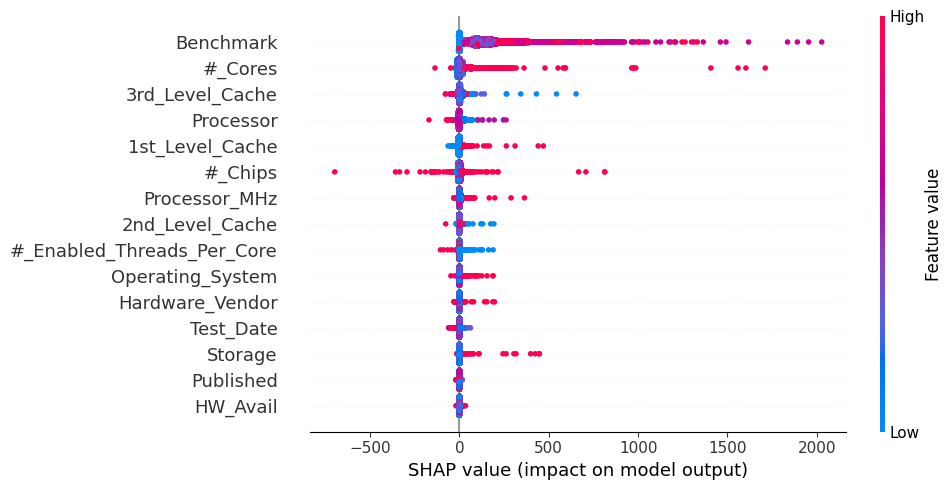

In [ ]:
#shap.summary_plot(sv.values,X.values,feature_names=X_vars,plot_type='dot',max_display=len(X_vars),)
shap.summary_plot(sv.values,dataset.values,feature_names=dataset.columns,plot_type='dot',max_display=15, plot_size=(10,5))

#TESTS

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model, save_model
MLP_test_model=load_model('/content/drive/MyDrive/PROJET LIRMM/SPEC_MLP.h5')
#NN_model = load_model('/content/drive/MyDrive/PROJET LIRMM/pred_model.h5')
#NN_model = pred_model
CNN_test_model=load_model('/content/drive/MyDrive/PROJET LIRMM/SPEC_CNN.h5')
# Assuming y contains the real values

real_values = target.iloc[1008:1059].to_numpy()
example_data = dataset[1008:1059]
# exmpl_data = scaler.transform(dataset[1108:1209])
# exmpl_data0 = encoder.predict(exmpl_data)
# exmpl_data = np.concatenate([exmpl_data, exmpl_data0], axis=1)
# Assuming MLP_predictions, CNN_predictions, and NN_predictions are NumPy arrays
#Residual_predictions = Residual_test_model(example_data)
MLP_predictions = MLP_test_model.predict(example_data)
CNN_predictions = CNN_test_model.predict(example_data)
NN_predictions = pred_model.predict(example_data)

# Create a DataFrame to display the real values and predictions side by side
results_df = pd.DataFrame({
    'Real Values': real_values,
    #'Residual predictions' : Residual_predictions.flatten(),
    'MLP Predictions': MLP_predictions.flatten(),
    'CNN Predictions': CNN_predictions.flatten(),
    'NN Predictions': NN_predictions.flatten()
})



2/2 [==============================] - 0s 6ms/step


In [ ]:
results_df

,Real Values,MLP Predictions,CNN Predictions,NN Predictions
0,7.12,7.617782,7.465178,7.188743
1,7.66,7.878814,8.203261,7.487000
2,7.81,8.117777,7.465178,8.865079
3,9.66,8.962185,9.540342,9.008267
4,8.35,8.884839,8.604551,8.151144
5,8.19,9.947134,8.416353,7.983691
6,9.71,9.945326,9.904985,9.694502
7,4.04,3.598201,4.100654,4.294673
8,4.04,3.400304,4.073323,4.197420
9,4.18,3.719212,4.362823,3.842600


In [ ]:
results_df = results_df.sort_values(by='Real Values').reset_index(drop=True)

In [ ]:
results_df

,Real Values,MLP Predictions,CNN Predictions,NN Predictions
0,4.04,3.598201,4.100654,4.294673
1,4.04,3.400304,4.073323,4.197420
2,4.18,3.719212,4.362823,3.842600
3,4.65,5.424184,4.473214,5.023552
4,5.53,6.097501,5.925875,5.821166
5,7.12,7.617782,7.465178,7.188743
6,7.66,7.878814,8.203261,7.487000
7,7.81,8.117777,7.465178,8.865079
8,8.19,9.947134,8.416353,7.983691
9,8.35,8.884839,8.604551,8.151144


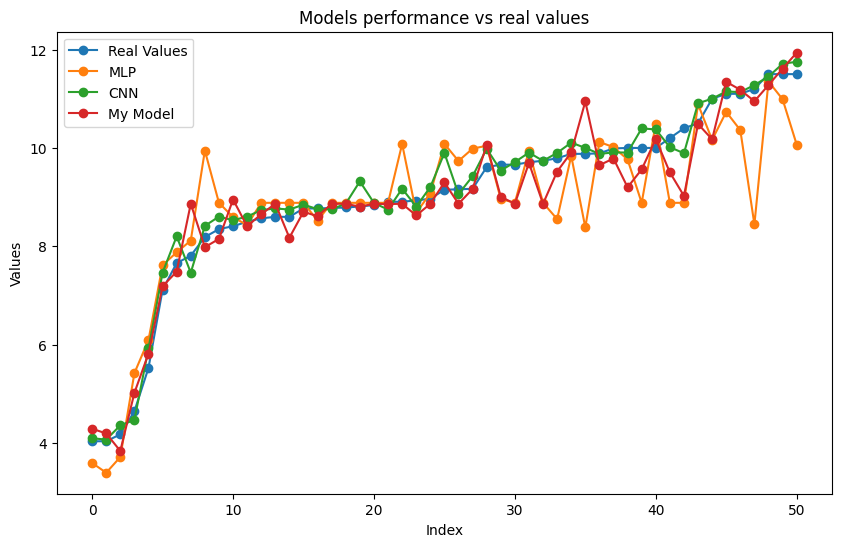

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting all four columns in the same graph
plt.figure(figsize=(10, 6))

# Line plot
plt.plot(results_df['Real Values'], label='Real Values', marker='o')
plt.plot(results_df['MLP Predictions'], label='MLP', marker='o')
plt.plot(results_df['CNN Predictions'], label='CNN', marker='o')
plt.plot(results_df['NN Predictions'], label='My Model', marker='o')

# Scatter plot (uncomment the line below to use scatter plot)
# plt.scatter(df.index, df['Column1'], label='Column1')
# plt.scatter(df.index, df['Column2'], label='Column2')
# plt.scatter(df.index, df['Column3'], label='Column3')
# plt.scatter(df.index, df['Column4'], label='Column4')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Models performance vs real values')
plt.legend()
plt.show()

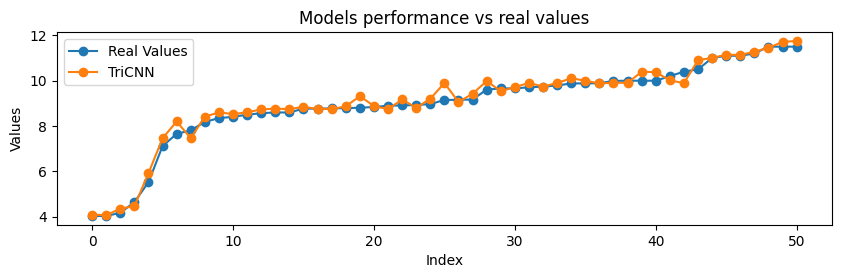

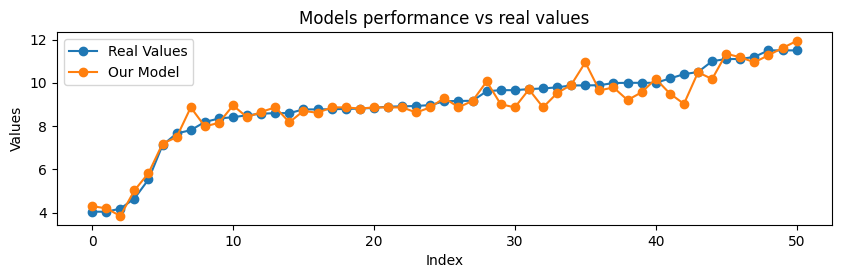

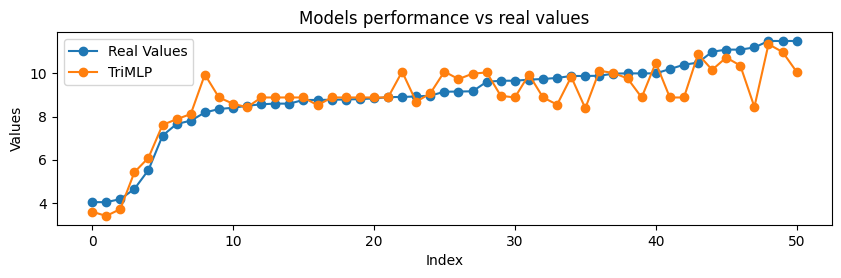

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting all four columns in the same graph
plt.figure(figsize=(10, 2.5))

# Line plot
plt.plot(results_df['Real Values'], label='Real Values', marker='o')
# plt.plot(results_df['MLP Predictions'], label='MLP', marker='o')
plt.plot(results_df['CNN Predictions'], label='TriCNN', marker='o')
# plt.plot(results_df['NN Predictions'], label='My Model', marker='o')

# Scatter plot (uncomment the line below to use scatter plot)
# plt.scatter(df.index, df['Column1'], label='Column1')
# plt.scatter(df.index, df['Column2'], label='Column2')
# plt.scatter(df.index, df['Column3'], label='Column3')
# plt.scatter(df.index, df['Column4'], label='Column4')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Models performance vs real values')
plt.legend()
plt.show()


plt.figure(figsize=(10, 2.5))

# Line plot
plt.plot(results_df['Real Values'], label='Real Values', marker='o')
#plt.plot(results_df['MLP Predictions'], label='MLP', marker='o')
#plt.plot(results_df['CNN Predictions'], label='CNN', marker='o')
plt.plot(results_df['NN Predictions'], label='Our Model', marker='o')


plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Models performance vs real values')
plt.legend()
plt.show()


plt.figure(figsize=(10, 2.5))

# Line plot
plt.plot(results_df['Real Values'], label='Real Values', marker='o')
plt.plot(results_df['MLP Predictions'], label='TriMLP', marker='o')
#plt.plot(results_df['CNN Predictions'], label='CNN', marker='o')
#plt.plot(results_df['NN Predictions'], label='My Model', marker='o')


plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Models performance vs real values')
plt.legend()
plt.show()

